![](https://blog.cengage.com/wp-content/uploads/2020/05/Test-tsking.jpg)

# Using Visualisation to disocver correlations

* [1. Loading the nessecary](#1)
* [2. Checking the data](#2)
* [3. Data Visualisations](#3)
    * [ Heatmap](#4)
    * [ Histograms](#5)
    * [ Scatterplots and Relplots](#6)
    * [ Boxplot](#7)
    * [ Jointplot](#8)
    * [ Swarmplots](#9)
* [Conclusion](#10)


<a id = "1"></a><br>
# Loading The Nessecary

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
from matplotlib import rcParams

In [2]:
data = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")

<a id = "2"></a><br>
# Checking The Data

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
data ["peducation"] = data["parental level of education"]
data = data.drop(columns ="parental level of education")
data.columns

Index(['gender', 'race/ethnicity', 'lunch', 'test preparation course',
       'math score', 'reading score', 'writing score', 'peducation'],
      dtype='object')

<a id = "3"></a><br>
# Data Visualisations

<a id = "4"></a><br>
### Heatmaps

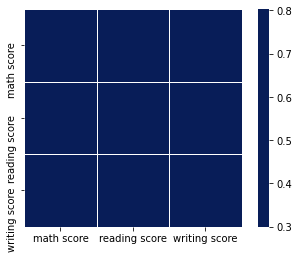

In [8]:
 sns.heatmap(data[["gender", "race/ethnicity", "lunch", "math score", "reading score", "writing score","peducation"]].corr(),cmap="YlGnBu",vmax=0.3, center=0,square=True,linewidth=0.5);

Not getting a great deal from this heatmap so I'll transform the data into all numerical data and see what kind of heatmap i can generate.

In [9]:
data1 = data.replace({"male":1,"female":0})

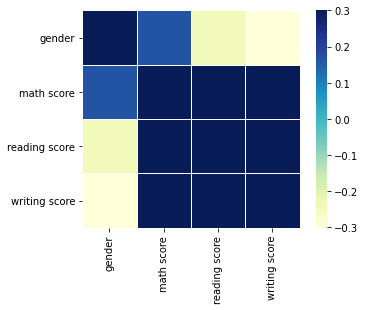

In [10]:
 sns.heatmap(data1[["gender", "race/ethnicity", "lunch", "math score", "reading score", "writing score","peducation"]].corr(),cmap="YlGnBu",vmax=0.3, center=0,square=True,linewidth=0.5);

This is already looking far more promising after just including genbder. I can already tell that theres a slight positive correlation between gender and math score and also a negative correlation betwen writing score and gender. It would be interesting to see how much this can change when the rest of the data is managed differently


In [11]:
data1["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [12]:
data1 = data1.replace({"group A": 1, "group B": 2, "group C": 3, "group D": 4, "group E": 5})

In [13]:
data1["peducation"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: peducation, dtype: int64

In [14]:
data1 = data1.replace({"some high school":1, "high school":2, "some college":3 , "associate's degree":4 , "bachelor's degree":5, "master's degree":6})

In [15]:
data.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [16]:
data1 = data1.replace({"free/reduced":1, "standard":2})

In [17]:
data["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [18]:
data1 = data1.replace({"none":1, "completed":2})

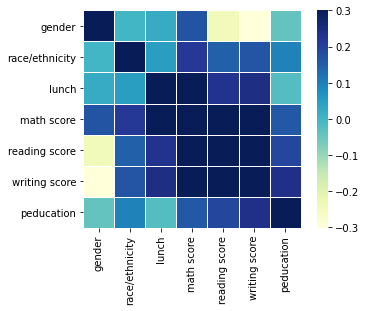

In [19]:
 sns.heatmap(data1[["gender", "race/ethnicity", "lunch", "math score", "reading score", "writing score","peducation"]].corr(),cmap="YlGnBu",vmax=0.3, center=0,square=True,linewidth=0.5);

Now this is much mor visually pleasing. 

So I can see that there are good correlations that would require further investigation. 
* Reading and writing score VS gender provides a negative correlation to quite a high degree.
* Math, Reading and Writing scores have a highly positive correlation.


<a id = "5"></a><br>
### Histograms

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


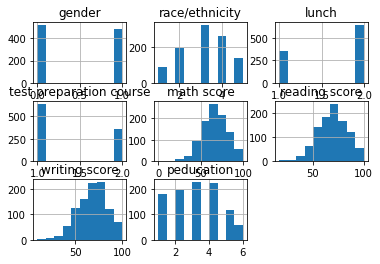

In [20]:
data1.hist();

<a id = "6"></a><br>
### Scatterplots and Relplots

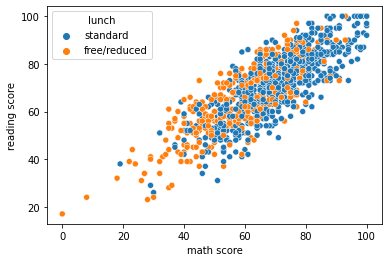

In [21]:
sns.scatterplot(data=data, x="math score", y="reading score", hue="lunch");

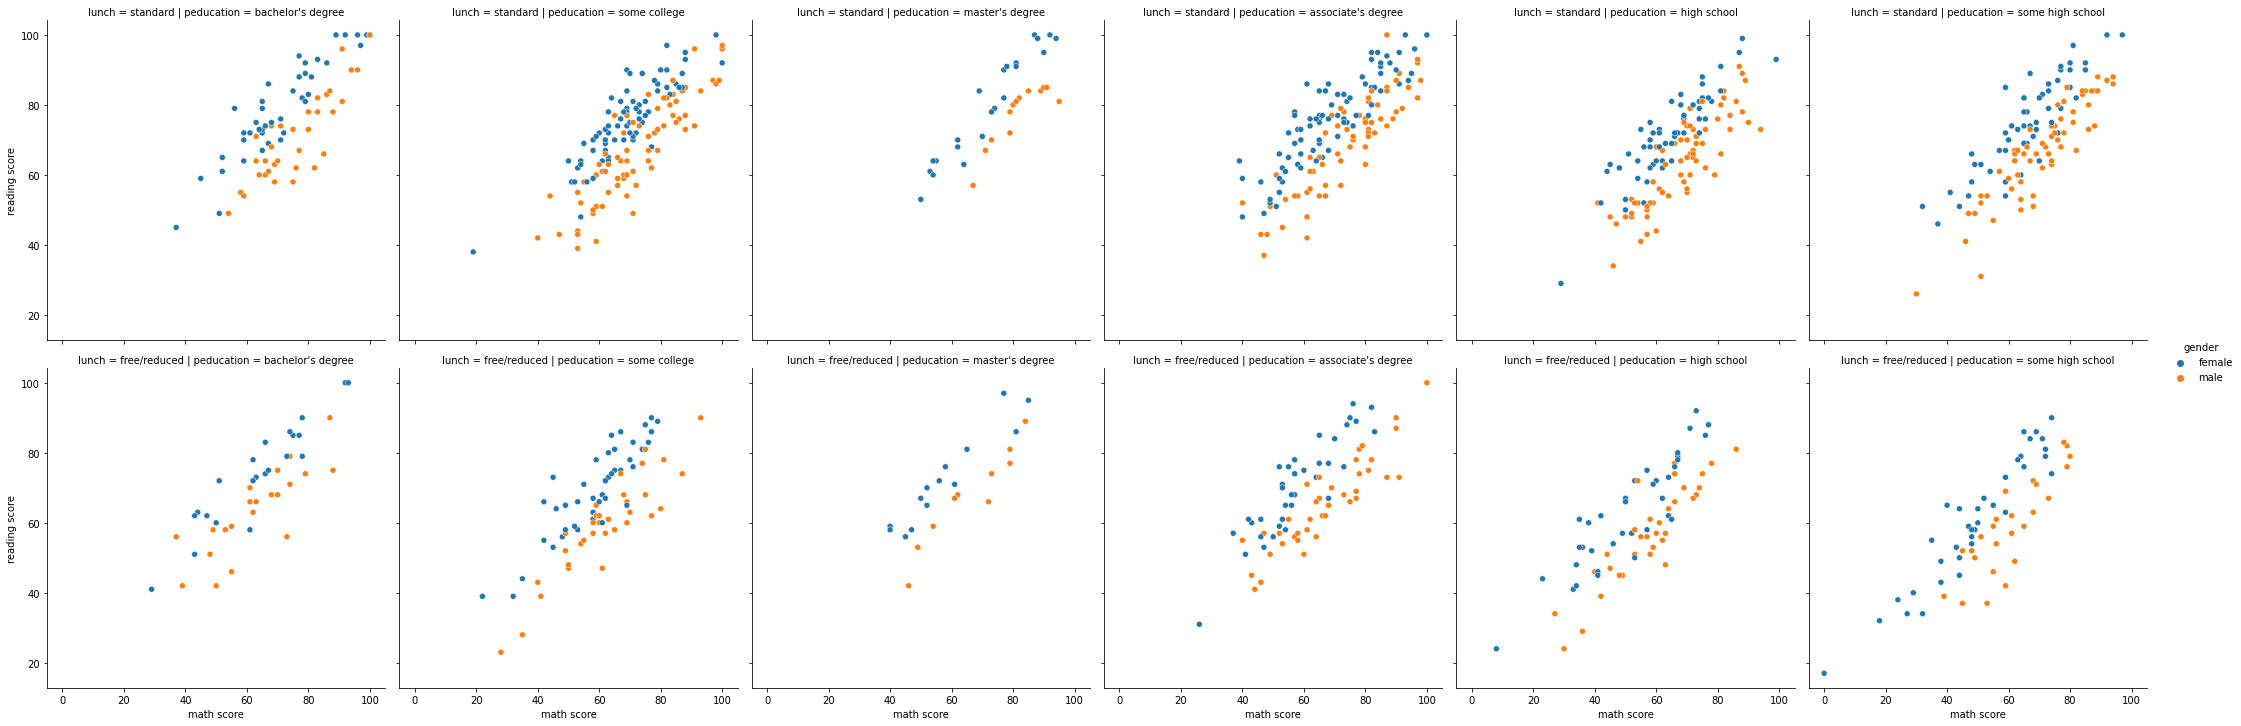

In [22]:
sns.relplot(data=data, x="math score", y="reading score", hue="gender", col="peducation", row="lunch");

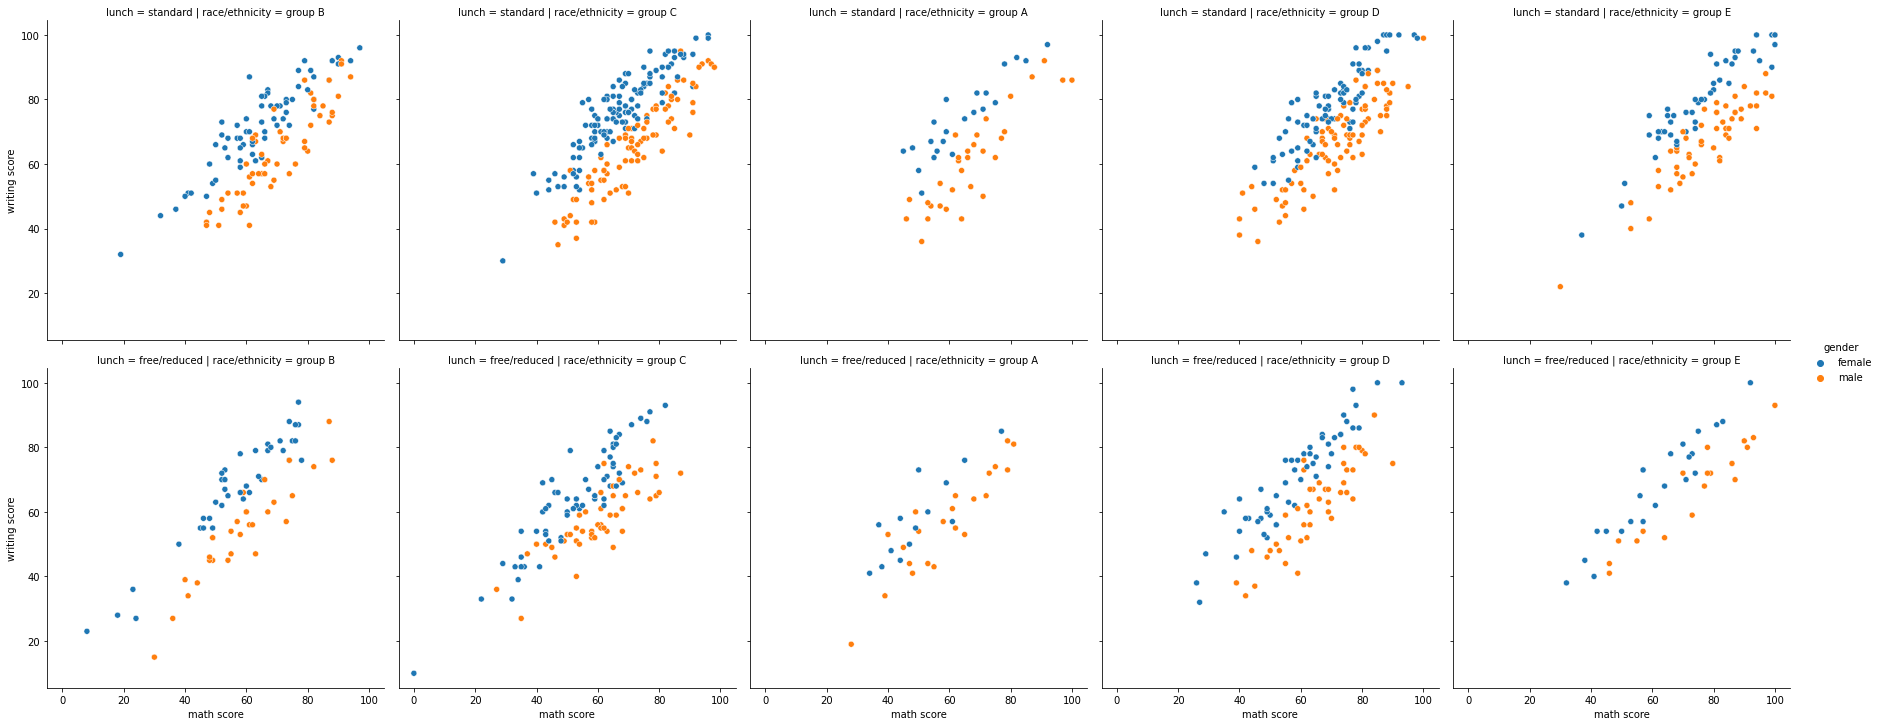

In [23]:
sns.relplot(data=data, x="math score", y="writing score", hue="gender", col="race/ethnicity", row="lunch");

Looking at these graphs, there doesnt seem to be any discernable correlation for the types of lunch they had

There is however a massively clear correlation that females outperform the males in every single category.


<a id = "7"></a><br>
### Boxplots

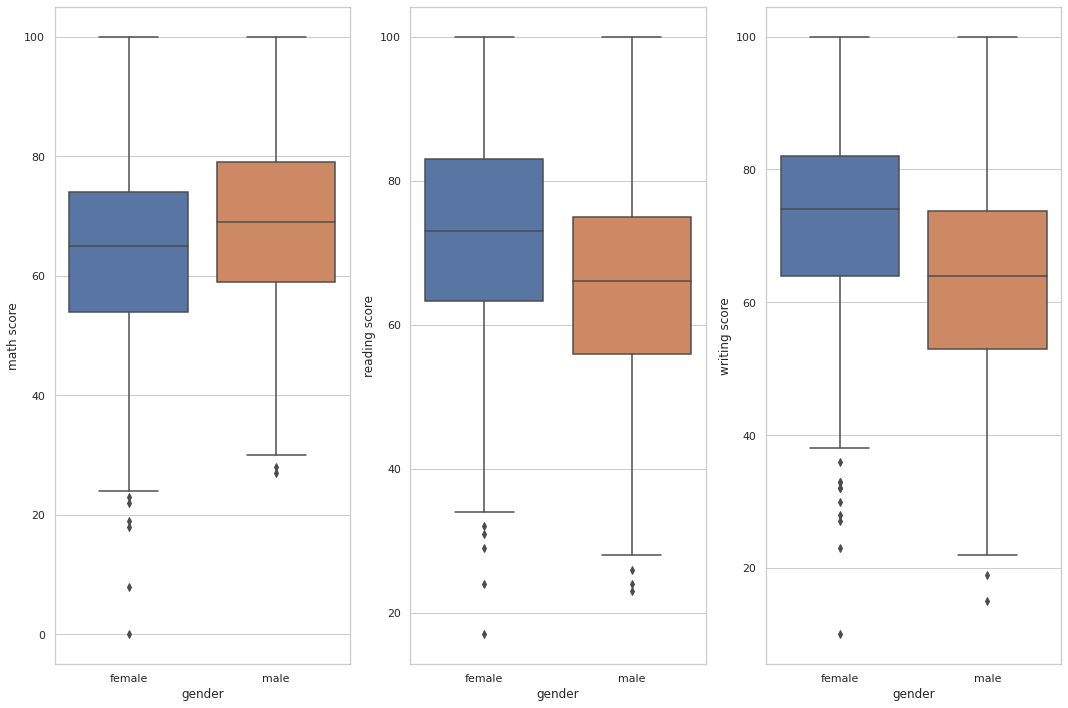

In [24]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
mathgender = sns.boxplot(x="gender", y="math score", data=data,  ax=axes[0])
readgender = sns.boxplot(x="gender", y="reading score", data=data,  ax=axes[1])
writegender = sns.boxplot(x="gender", y="writing score", data=data,  ax=axes[2])
plt.tight_layout();

This is quite interesting. After recognising the correlation I took a deeper dive into it to see how different the scores were between genders.

Only in the Math Scores do the Males of the data have an edge. From the boxplots i can clearly see that in Reading and writing Females have a much more distrinct advantage.



In [25]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
data.quantile([0.1,0.2,0.3,.04,0.5,0.6,0.7,0.8,0.9,1], axis=0)

,math score,reading score,writing score
0.10,47.00,51.00,48.0
0.20,53.00,57.00,54.0
0.30,59.00,62.00,60.0
0.04,39.96,42.96,41.0
0.50,66.00,70.00,69.0
0.60,70.00,74.00,73.0
0.70,74.00,77.00,77.0
0.80,79.00,82.00,81.0
0.90,86.00,87.10,87.0
1.00,100.00,100.00,100.0


In [27]:
statistics.stdev(data["math score"], xbar=None)

15.163080096009452

<a id = "8"></a><br>
### Jointplots

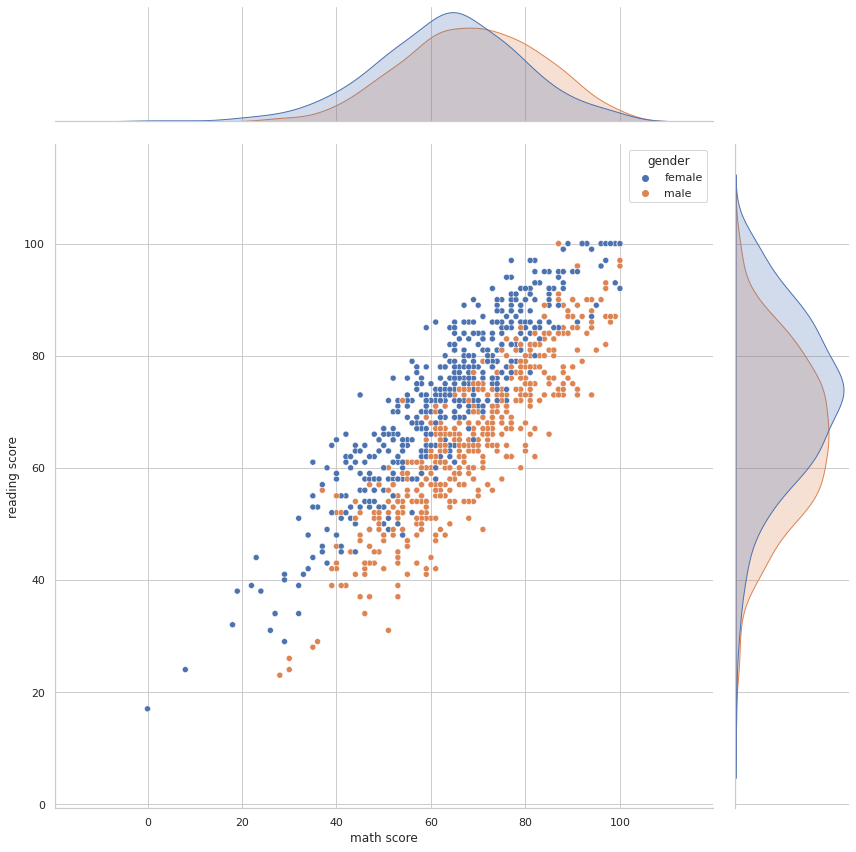

In [28]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(25,28))
ax = sns.jointplot(data=data, x="math score", y="reading score", hue="gender", height=12);

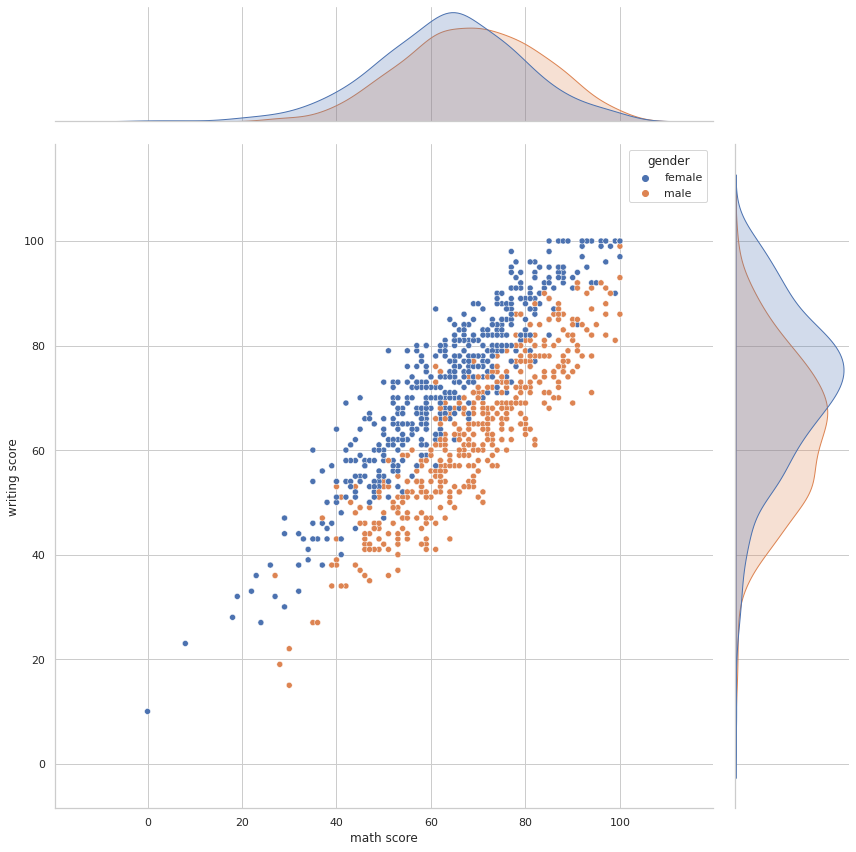

In [29]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(25,28))
ax = sns.jointplot(data=data, x="math score", y="writing score", hue="gender", height=12);

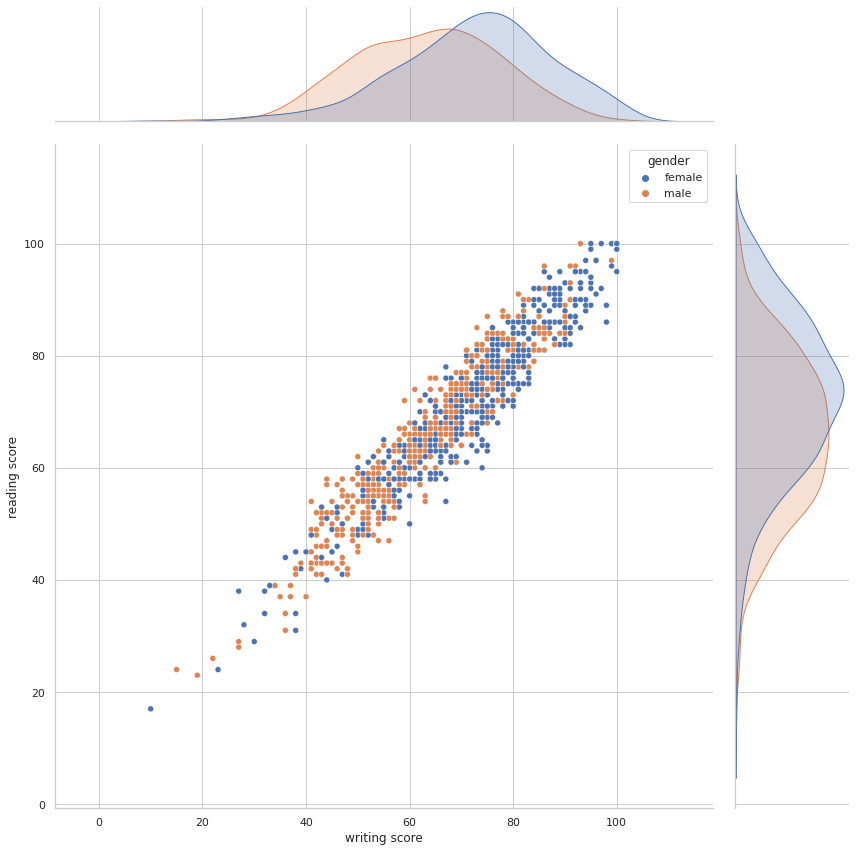

In [30]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(25,28))
ax = sns.jointplot(data=data, x="writing score", y="reading score", hue="gender", height=12);

Look how closely correlated things are between the males and females when it comes down to a comparison between the reading and writing.

<a id = "9"></a><br>
### Swarmplot

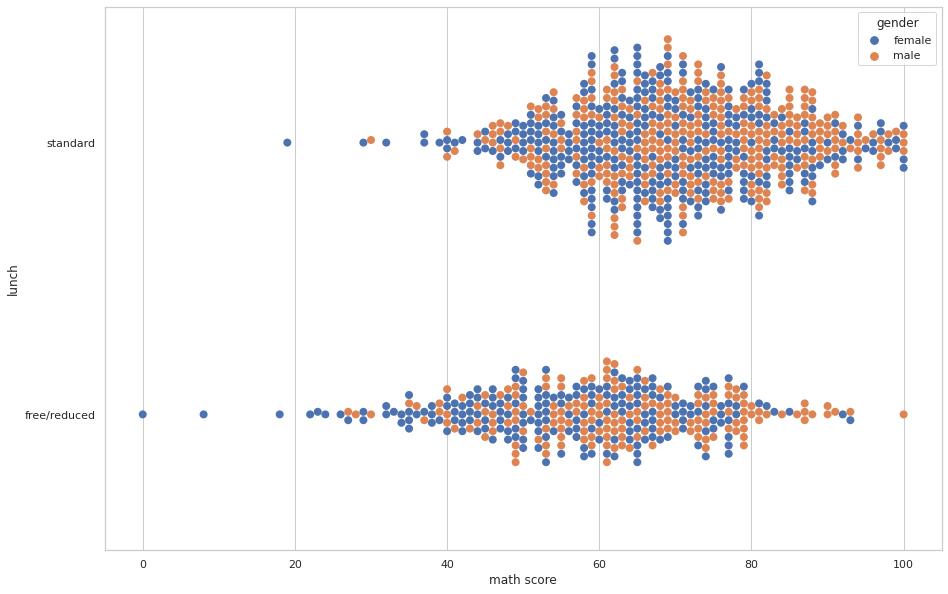

In [31]:
plt.figure(figsize=(15,10))
ax = sns.swarmplot(data=data, x="math score", y="lunch", hue="gender",size=8.0);

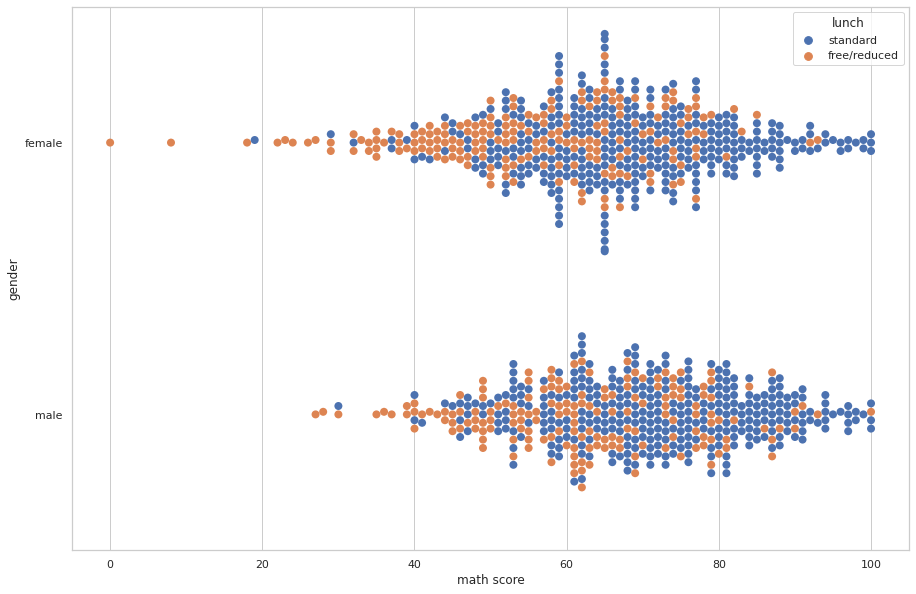

In [32]:
plt.figure(figsize=(15,10))
ax = sns.swarmplot(data=data, x="math score", y="gender", hue="lunch",size=8.0);

This swarmplot of math scores against the type of lunch speaks quite the story too. I was really suprised to see this in such clear detail.

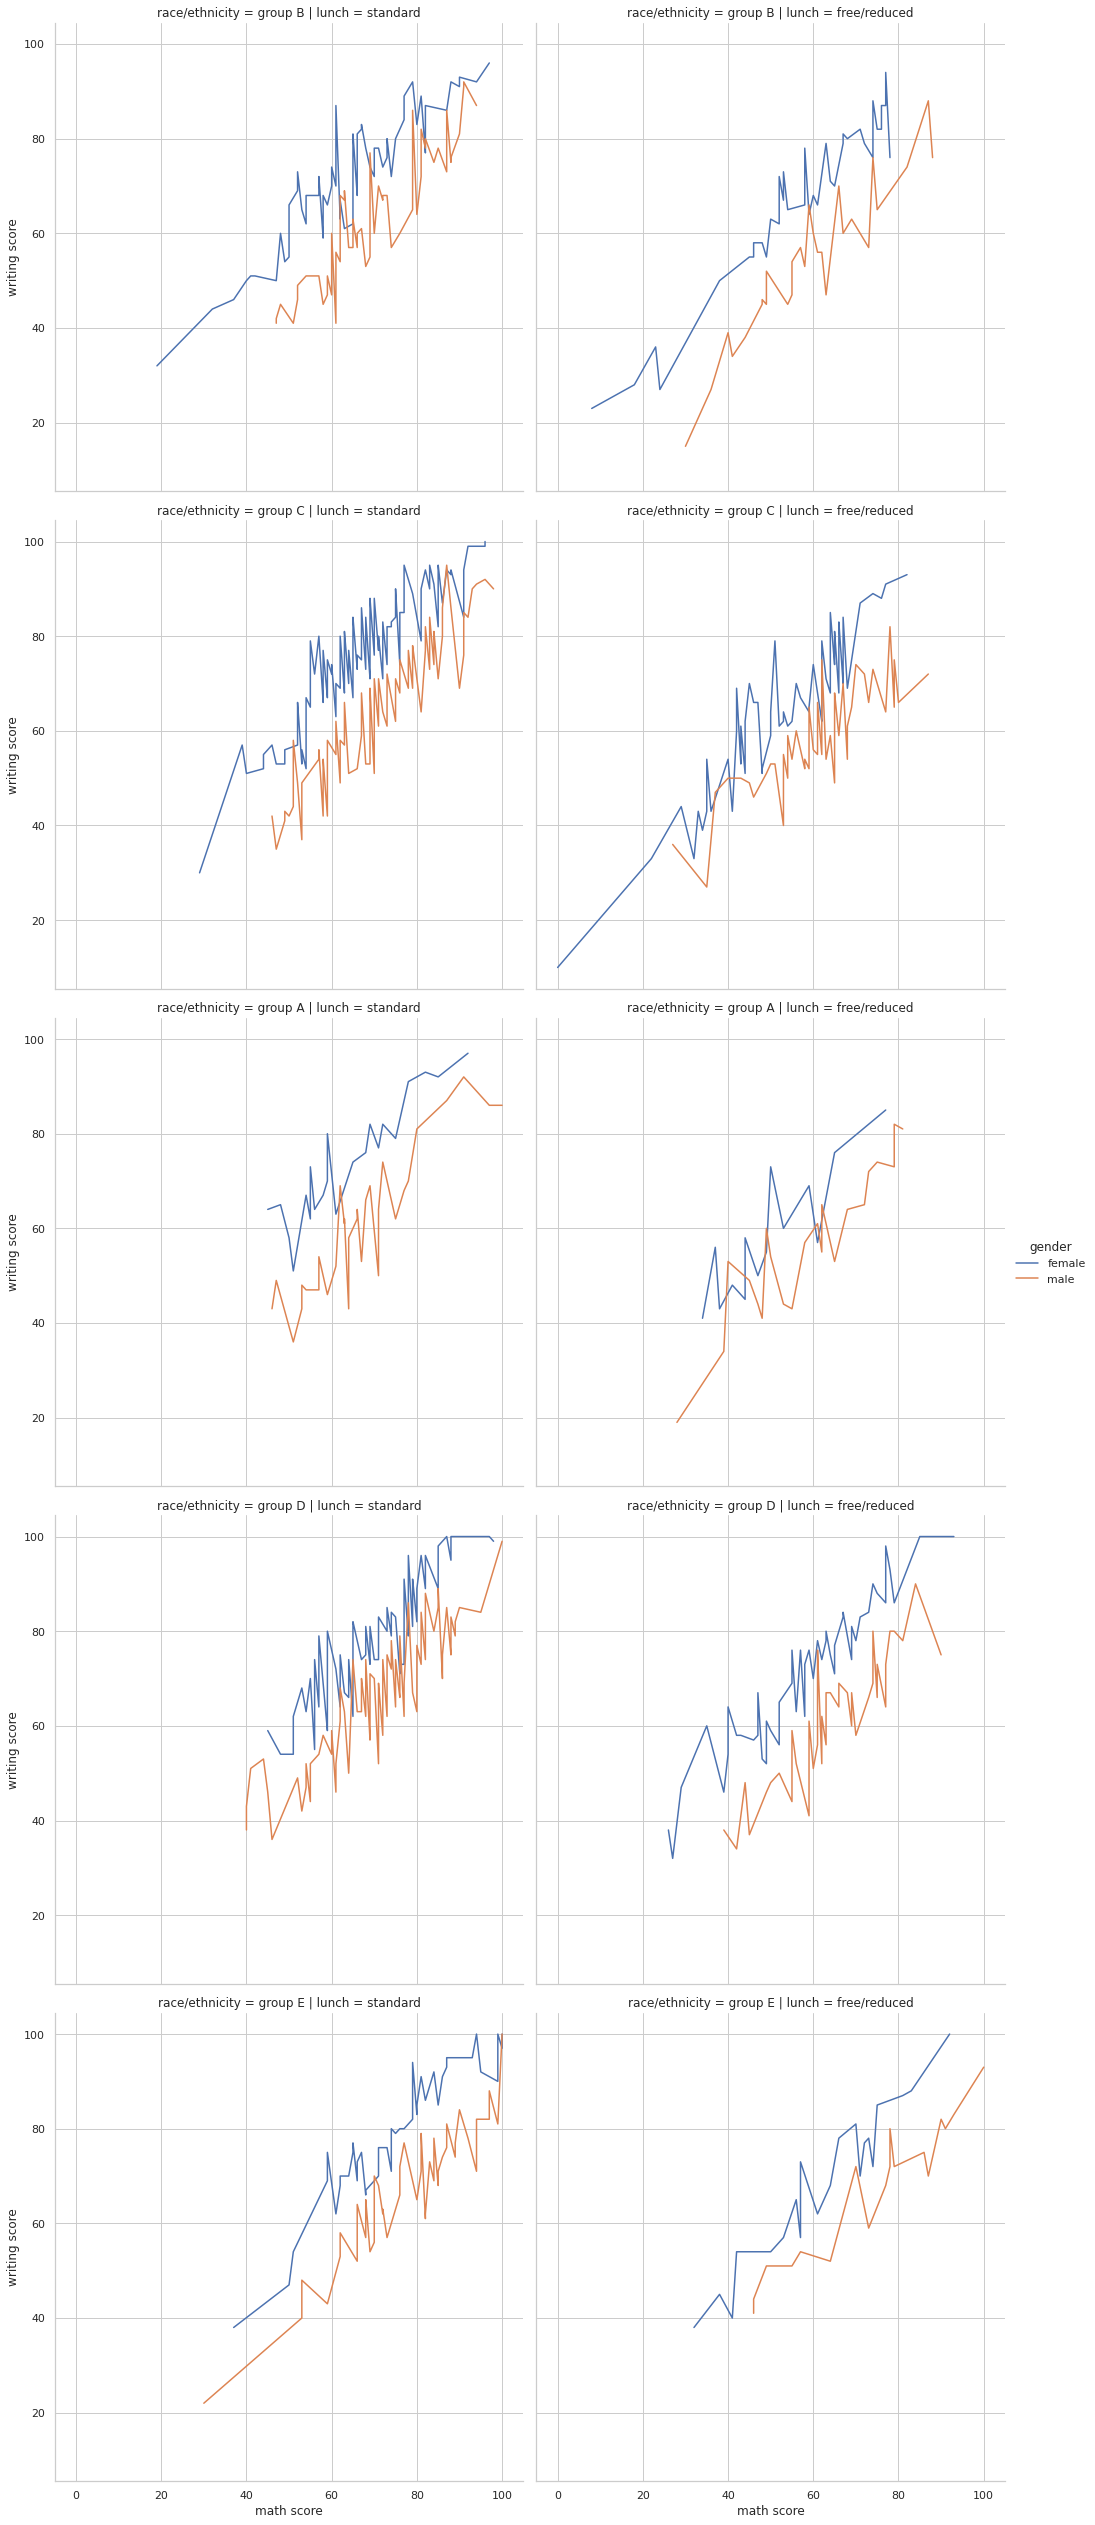

In [33]:
sns.relplot(x="math score", y="writing score", hue="gender",
            col="lunch", row="race/ethnicity", height=7,
            kind="line", estimator=None, data=data, legend="full");

This relplot shows a nice pattern by way of ethnicity. Group A whose lunch is free/reduced math and writing scores are much lower in comparison to Group C whose lunch is standard fore the same set of tests.
They 

<a id = "10"></a><br>
# Conclusion
Ive drawn the graphs and I have come to a conclusion. You can clearly see a great number of correlations between some of the different value streams.

Generally speaking, females do better than males, with the exception of Maths, where males slightly excel. 

Out of the ones that took the Maths test, someone taking a standard lunch was more likely to achieve a higher result whether male or female.

Group C's ethniicty values with a standard lunch meant that they were far more likely to get a higher score when compared with their writing scores.

I think it goes without saying that there are very clear correlations.

Gender and maths test with the lunch values as a hue is a fantastic graph to point out how clear this correlation really is.




Thanks for reading through this EDA. I tried to experiment a bit with some different graphs and I think the swarmplot is one of my new favourites. Follow me to see more, i'll probably be experimenting with the colour schemes of the outputs.